In [ ]:
!pip install pandas scikit-learn sentence-transformers matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 클러스터링 4개로 시도
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/문화data/Ontology_positive_reviews9.csv")

# 2. 문장 임베딩 (BGE-M3 또는 KR-SBERT 등)
model = SentenceTransformer("snunlp/KR-SBERT-V40K-klueNLI-augSTS")  # Colab에선 이 모델 추천
embeddings = model.encode(df["review"].tolist(), show_progress_bar=True)

# 3. 클러스터링 (KMeans, 클러스터 수는 임의로 지정)
n_clusters = 4  # 필요에 따라 조정
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(embeddings)

# 4. 클러스터별 대표 리뷰 추출 (클러스터 중심과 가장 가까운 리뷰)
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, embeddings)

print("\n📌 클러스터별 대표 리뷰 예시:")
for cluster_num in range(n_clusters):
    idx = closest[cluster_num]
    print(f"\n[Cluster {cluster_num}]")
    print(f"- Drama: {df.iloc[idx]['drama']}")
    print(f"- Review: {df.iloc[idx]['review']}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/23 [00:00<?, ?it/s]


📌 클러스터별 대표 리뷰 예시:

[Cluster 0]
- Drama: 추리의 여왕
- Review: 전편처럼 재미졌으 ㅎ

[Cluster 1]
- Drama: 아름다운 그대에게
- Review: 유치하다. 인정하고 싶지 않지만 재밌었다.

[Cluster 2]
- Drama: 땐뽀걸즈
- Review: 무엇이든 과정과 결실, 그 안에서의 관계가 주는 기쁨은 참 좋다. 노력할수록 더더욱. 그걸 느껴본 지가 참 오래된 것 같다. / 친숙한 풍경 속 몰랐던 이야기 / 학생들의 에너지가 대단하다 ㅎㅎ - CGV 통영 1520 6E5

[Cluster 3]
- Drama: 아이템
- Review: 유쾌하고 따뜻하다.. 행복한 10가지 생각해봐야지!


In [ ]:
# 5. 드라마별 대표 클러스터 계산 (가장 많은 리뷰가 속한 클러스터)
drama_cluster_counts = df.groupby(['drama', 'cluster']).size().reset_index(name='count')
drama_main_cluster = drama_cluster_counts.sort_values(['drama', 'count'], ascending=[True, False])
drama_main_cluster = drama_main_cluster.drop_duplicates(subset=['drama'])
drama_main_cluster = drama_main_cluster.rename(columns={'cluster': 'main_cluster'})

# 6. 클러스터 라벨 매핑 (사람이 해석한 라벨)
cluster_label_map = {
    0: "유쾌한 에너지와 케미가 살아있는 드라마",
    1: "재미있는 전개와 코믹한 매력이 있는 드라마",
    2: "감정과 공감에 집중한 감성적인 드라마",
    3: "따뜻한 정서와 위로를 전하는 드라마"
}

drama_main_cluster["label"] = drama_main_cluster["main_cluster"].map(cluster_label_map)

# 7. df에 드라마별 대표 클러스터 및 라벨 병합
df = df.merge(drama_main_cluster[['drama', 'main_cluster', 'label']], on='drama', how='left')
df = df.rename(columns={"label": "main_cluster_label"})

# 8. 결과 확인
print("\n📌 드라마별 대표 감성 클러스터:")
print(drama_main_cluster.head())

# 9. (선택) 드라마별 클러스터 분포 비율 보기
pivot = df.groupby(['drama', 'cluster']).size().unstack(fill_value=0)
pivot['total'] = pivot.sum(axis=1)
pivot_ratio = pivot.div(pivot['total'], axis=0).drop(columns='total')
print("\n📊 드라마별 클러스터 분포 비율:")
print(pivot_ratio.head())

# 10. (선택) CSV로 저장
drama_main_cluster.to_csv("/content/drive/MyDrive/문화data/drama_main_cluster_labeled.csv", index=False)
df.to_csv("review_with_cluster_labels.csv", index=False)



📌 드라마별 대표 감성 클러스터:
                 drama  main_cluster  count                    label
0  (아는 건 별로 없지만) 가족입니다             0      1    유쾌한 에너지와 케미가 살아있는 드라마
2               18 어게인             0      1    유쾌한 에너지와 케미가 살아있는 드라마
4                  SF8             2      1     감정과 공감에 집중한 감성적인 드라마
5               SKY 캐슬             0      1    유쾌한 에너지와 케미가 살아있는 드라마
6                   가면             1      1  재미있는 전개와 코믹한 매력이 있는 드라마

📊 드라마별 클러스터 분포 비율:
cluster                0    1    2    3
drama                                  
(아는 건 별로 없지만) 가족입니다  0.5  0.0  0.5  0.0
18 어게인               0.5  0.0  0.5  0.0
SF8                  0.0  0.0  1.0  0.0
SKY 캐슬               1.0  0.0  0.0  0.0
가면                   0.0  1.0  0.0  0.0


In [ ]:
import numpy as np
print("\n📌 클러스터별 전체 리뷰 예시:")

for cluster_num in range(n_clusters):
    print(f"\n[Cluster {cluster_num}]")
    cluster_indices = np.where(kmeans.labels_ == cluster_num)[0]  # 해당 클러스터에 속한 인덱스
    for idx in cluster_indices:
        print(f"- Drama: {df.iloc[idx]['drama']}")
        print(f"- Review: {df.iloc[idx]['review']}")
    print(f"▶ 총 리뷰 수: {len(cluster_indices)}개\n")


📌 클러스터별 전체 리뷰 예시:

[Cluster 0]
- Drama: (아는 건 별로 없지만) 가족입니다
- Review: 흔하디 흔한 자극적 전개가 아닐까싶었지만 볼수록 오묘하고 생각하게 만드는 이야기들이 흥미롭다
- Drama: 18 어게인
- Review: 기분 좋아지는 휴먼 판타지 이도현의 발견, 찐 농구 장면 인정~
- Drama: 개와 늑대의 시간
- Review: 재미있어요.
- Drama: 갯마을 차차차
- Review: 자극적이지.않아 좋다
- Drama: 갯마을 차차차
- Review: 두 사람 미소만으로 청량한 바닷 바람 맞는 기분, 캐스팅 조합 미쳐따
- Drama: 거침없이 하이킥
- Review: 지금 봐도 재밌다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
- Drama: 검법남녀 2
- Review: 흥미진진
- Drama: 경우의 수
- Review: 초반부는 그래도 좋았다
- Drama: 계룡선녀전
- Review: 헐이거재밌았던듯!!!!
- Drama: 고교처세왕
- Review: 이거 진짜 재밌는데 볼사람
- Drama: 고교처세왕
- Review: 그냥 웃기고 재밌고,, 웃으면서 편하게 스트레스 풀려서 본 기억
- Drama: 구경이
- Review: 새로워!!! 짜릿해!!!
- Drama: 군검사 도베르만
- Review: 스토리는 꽤 흥미있다.. 이야기 진행도 나쁘지 않게 짜놓았다..
- Drama: 군검사 도베르만
- Review: 씹는 재미가 있다
- Drama: 굿캐스팅
- Review: 뻔하지만 그래도 작품에 의의를. 전체적인 톤은 유쾌하지만 결코 가볍지는 않은.
- Drama: 그 해 우리는
- Review: 청량감 넘치는 드라마가 시작되었다
- Drama: 그 해 우리는
- Review: 진짜 뻔한데 진짜 재밌어 그때 나를 보는 것만 같아서 그때 너를 보는 것만 같아서
- Drama: 그 해 우리는
- Review: 분위기는 아련하고, 포근하다. 이야기는 재치있고, 단단하다.
- Drama: 그냥 사랑하는 사이
- Review

Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


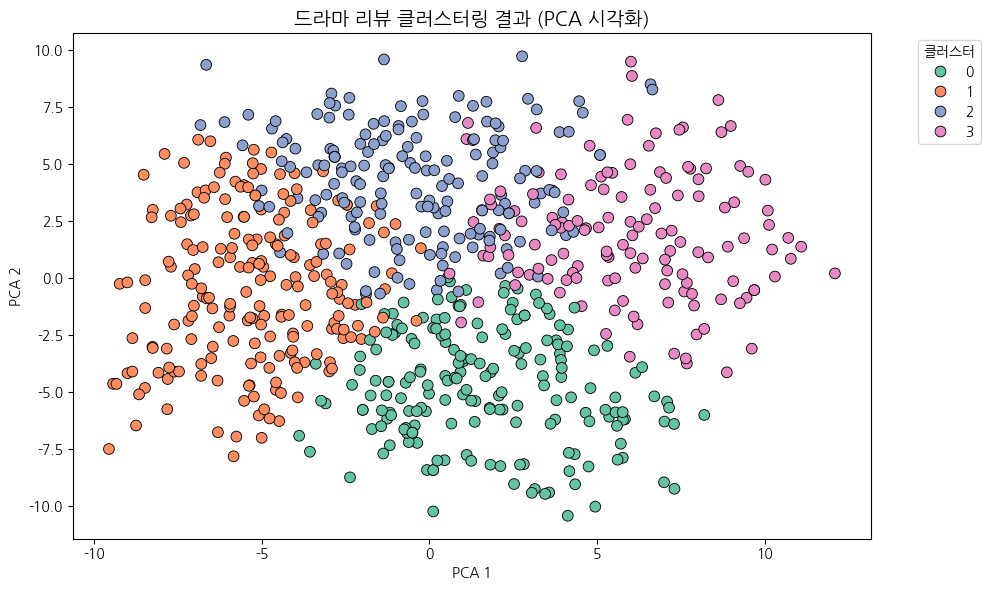

In [ ]:
# 📌 1. 한글 폰트 설치 및 등록
!apt-get -qq install -y fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os

# 📌 2. 나눔고딕 폰트 경로 등록
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 깨짐 방지

# 📌 3. PCA 차원 축소 및 시각화
from sklearn.decomposition import PCA

# 5. 차원 축소 (PCA 사용)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
df["pca_x"] = reduced_embeddings[:, 0]
df["pca_y"] = reduced_embeddings[:, 1]

# 6. 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="pca_x", y="pca_y",
    hue="cluster",
    data=df,
    palette="Set2",
    s=60, edgecolor="black"
)
plt.title("드라마 리뷰 클러스터링 결과 (PCA 시각화)", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="클러스터", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 워드 클라우드

In [ ]:
# 📌 1. 설치 (코랩에서만 필요)
!pip install konlpy wordcloud
!apt-get -qq install -y fonts-nanum

# 📌 2. 라이브러리 임포트
from konlpy.tag import Okt
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import os

# 📌 3. 한글 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 33.9 MB/s eta 0:00:00


In [ ]:
# 📌 4. 전처리 함수: 명사 추출 + 불용어 제거 + 한 글자 제거
okt = Okt()

stopwords = {
    "드라마", "사람", "그냥", "생각", "다시", "이야기", "나라", "바보",
    "지금", "이제", "과거", "뭔가", "무슨", "뭐", "그", "로써", "이마이",
    "또", "정도", "이렇게", "그리고", "정말", "진짜", "영화", "작가","시작",
    "전개", "내용", "과정", "속도", "주제", "상황", "보다", "보는", "봤다", "이런",
    "그", "그때", "이건", "그런", "시작", "설계", "전환", "모두"
}

def preprocess(text):
    tokens = okt.nouns(text)              # 명사만 추출
    tokens = [t for t in tokens if len(t) > 1 and t not in stopwords]  # 한 글자 제거 + 불용어 제거
    return tokens

In [ ]:
# 📌 5. 클러스터별 워드클라우드 생성 함수
def make_wordcloud_by_cluster(df, cluster_num, font_path):
    # 해당 클러스터 리뷰 추출
    texts = df[df['cluster'] == cluster_num]['review'].dropna().tolist()

    # 모든 텍스트 병합 및 토큰화
    all_tokens = []
    for text in texts:
        all_tokens.extend(preprocess(text))

    # 단어 빈도 계산
    counter = Counter(all_tokens)

    # 워드클라우드 생성
    wordcloud = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=400,
        max_words=100
    ).generate_from_frequencies(counter)

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'클러스터 {cluster_num} 워드클라우드', fontsize=16)
    plt.show()


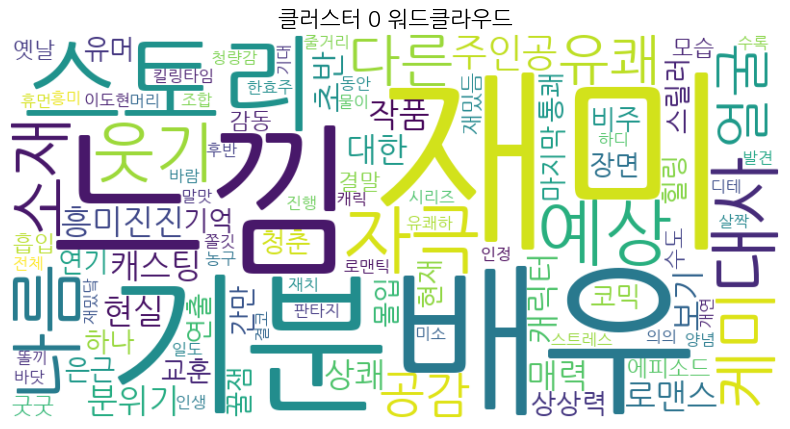

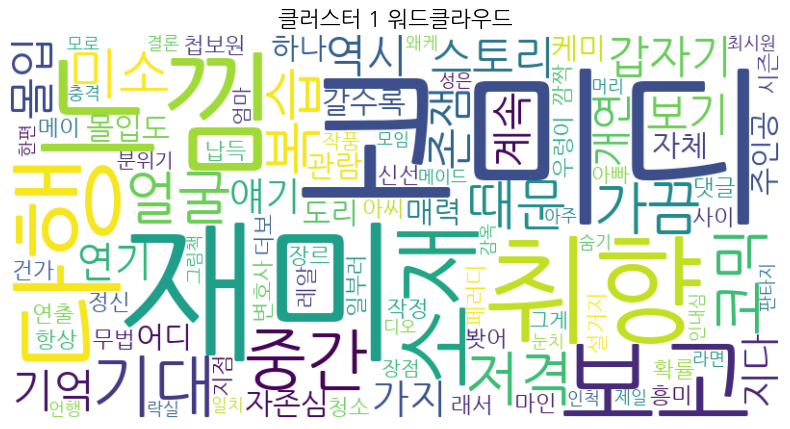

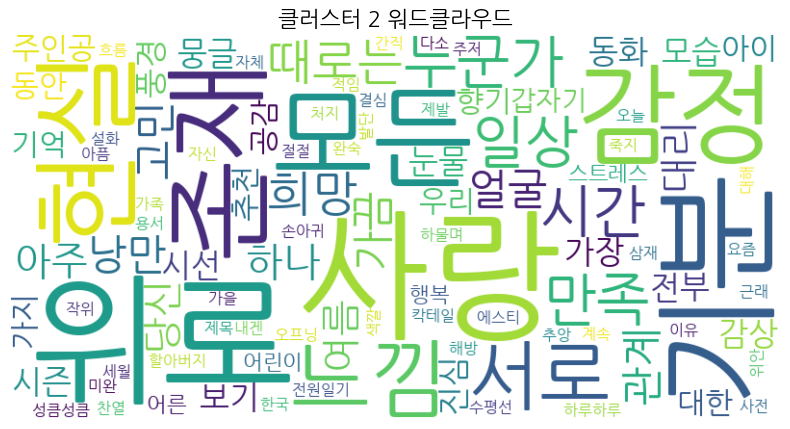

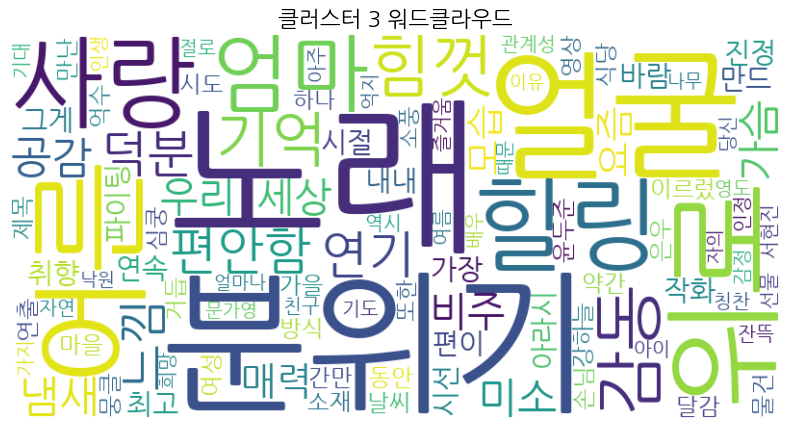

In [ ]:
# 📌 6. 전체 클러스터 반복 실행
for cluster_num in sorted(df['cluster'].unique()):
    make_wordcloud_by_cluster(df, cluster_num, font_path)

*   클러스터0 : 유쾌한 에너지와 케미가 살아있는 드라마
*   클러스터1 : 재미있는 전개와 코믹한 매력이 있는 드라마
*   클러스터2 : 감정과 공감에 집중한 감성적인 드라마
*   클러스터3 : 따뜻한 정서와 위로를 전하는 드라마



